#Εργασία 10 - Clustering

Ον/μο: Μαρία Καρλάκη ΑΕΜ: 244

Φόρτωση Βιβλιοθηκών

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_distances
from sklearn.cluster import DBSCAN
import hdbscan

/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


Φόρτωση dataset

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


Ερώτημα 1a

In [4]:
metadata_columns = [
    'track_id',
    'artists',
    'album_name',
    'track_name'
]
df_metadata = df[metadata_columns].copy()
df_features = df.drop(columns=metadata_columns)

Ερώτημα 1b: One-Hot Encoding στο genre

In [5]:
df_encoded = pd.get_dummies(df_features, columns=['track_genre'])

In [6]:
df_metadata.head()
df_encoded.shape

(114000, 130)

Εύρεση NaN τιμών

In [7]:
print("Συνολικά NaN:", df_encoded.isna().sum().sum())
nan_per_col = df_encoded.isna().sum()
nan_cols = nan_per_col[nan_per_col > 0].sort_values(ascending=False)
nan_cols


Συνολικά NaN: 0


,0


Αντιμετώπιση των NaN τιμών

In [8]:
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(df_encoded)

Κανονικοποίηση των χαρακτηριστικών με τη μέθοδο StandardScaler

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

print(X_scaled.shape)

(114000, 130)


Εφαρμογή αλγορίθμου k-Means

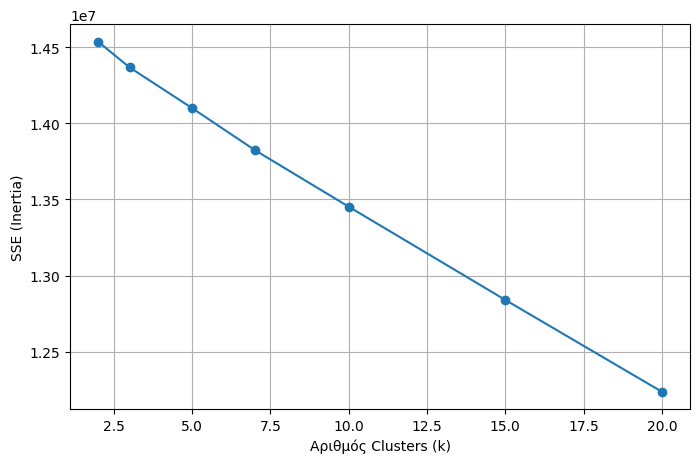

In [10]:
k_values = [2, 3, 5, 7, 10, 15, 20]

sse = []

for k in k_values:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, sse, marker='o')
plt.xlabel('Αριθμός Clusters (k)')
plt.ylabel('SSE (Inertia)')
plt.grid(True)
plt.show()

In [11]:
for k, val in zip(k_values, sse):
    print(f"k = {k:2d}  -->  SSE = {val:.2f}")

k =  2  -->  SSE = 14536933.01
k =  3  -->  SSE = 14368367.47
k =  5  -->  SSE = 14100106.17
k =  7  -->  SSE = 13824746.01
k = 10  -->  SSE = 13452262.01
k = 15  -->  SSE = 12839562.90
k = 20  -->  SSE = 12236005.06


Για κάθε τιμή του k υπολογίστηκε η μετρική SSE. Από τις αριθμητικές τιμές του SSE και το αντίστοιχο γράφημα του Elbow Method παρατηρείται ότι η μείωση του είναι έντονη μέχρι την τιμή k=10, ενώ για μεγαλύτερες τιμές η περαιτέρω μείωση είναι μικρότερη σε σχέση με την αύξηση της πολυπλοκότητας του μοντέλου.
Για τον λόγο αυτό επιλέγουμε το k=10 ως τον καταλληλότερο αριθμό για clusters.

Ερώτημα 5

In [12]:
optimal_k = 10

kmeans_final = KMeans(
    n_clusters=optimal_k,
    random_state=42,
    n_init=10
)

labels_ = kmeans_final.fit_predict(X_scaled)

In [13]:
df_metadata['cluster'] = labels_

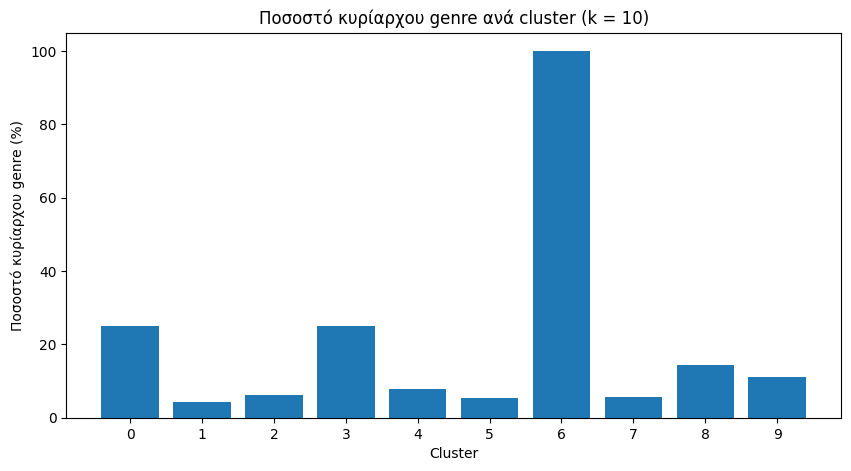

In [14]:
df_analysis = df_metadata.copy()
df_analysis['track_genre'] = df['track_genre'].values

dominant_genre_stats = []
for cluster_id in sorted(df_analysis['cluster'].unique()):

    cluster_data = df_analysis[df_analysis['cluster'] == cluster_id]

    total_tracks = len(cluster_data)

    genre_counts = cluster_data['track_genre'].value_counts()

    dominant_genre = genre_counts.idxmax()
    dominant_count = genre_counts.max()

    percentage = (dominant_count / total_tracks) * 100

    dominant_genre_stats.append({
        'cluster': cluster_id,
        'dominant_genre': dominant_genre,
        'percentage': percentage
    })

dominant_df_k10 = pd.DataFrame(dominant_genre_stats)
dominant_df_k10
plt.figure(figsize=(10, 5))
plt.bar(
    dominant_df_k10['cluster'],
    dominant_df_k10['percentage']
)

plt.xlabel('Cluster')
plt.ylabel('Ποσοστό κυρίαρχου genre (%)')
plt.title('Ποσοστό κυρίαρχου genre ανά cluster (k = 10)')
plt.xticks(dominant_df_k10['cluster'])
plt.show()

Ερώτημα 6

Βήμα 1 - Επιλογή τραγουδιού

In [15]:
selected_track_name = "S.O.S"

Βήμα 2 - Εύρεση στο dataset

In [16]:
selected_index = df_metadata[
    df_metadata['track_name'] == selected_track_name
].index[0]

selected_index

np.int64(36029)

Βήμα 3: Πληροφορίες τραγουδιού & cluster

In [17]:
selected_track = df_metadata.loc[selected_index]
selected_cluster = selected_track['cluster']

print("Τίτλος:", selected_track['track_name'])
print("Καλλιτέχνης:", selected_track['artists'])
print("Cluster:", selected_cluster)

Τίτλος: S.O.S
Καλλιτέχνης: Indila
Cluster: 5


Βήμα 4 - Παίρνουμε τα τραγούδια του ίδιου cluster

In [18]:
cluster_indices = df_metadata[
    df_metadata['cluster'] == selected_cluster
].index

Βήμα 5 - Ευκλείδια Απόσταση

In [19]:
selected_vector = X_scaled[selected_index].reshape(1, -1)
cluster_vectors = X_scaled[cluster_indices]
distances = euclidean_distances(selected_vector, cluster_vectors)[0]

Βήμα 6 - Top3 πιο κοντινά τραγούδια

In [20]:
recommendations = pd.DataFrame({
    'index': cluster_indices,
    'distance': distances
})

recommendations = recommendations[recommendations['index'] != selected_index]

top3 = recommendations.sort_values('distance').head(3)

df_metadata.loc[top3['index']]

,track_id,artists,album_name,track_name,cluster
36020,6tFTvOg7J59fmBmN0NlQge,Polo & Pan,Pop Fun and Christmas Music 2022,Magic,5
36537,1adwLzinGzckhrVfjQsjN9,Michel Sardou,Le choix du fou,Le figurant,5
36422,1zX4Lq4tYy3FxaQnLD8SeI,Paul Baloche,What a Friend We Have In Jesus (Audio Performa...,What a Friend We Have In Jesus,5


Ως τραγούδι αναφοράς επιλέχθηκε το S.O.S της Indila, το οποίο ανήκει στο cluster 5. Με βάση την Ευκλείδεια απόσταση και λαμβάνοντας υπόψη μόνο τα τραγούδια του ίδιου cluster, προέκυψαν ως πιο παρόμοια τα:

*   **Magic** - Polo & Pan
*   **Le figurant** - Michel Sardou
*   **What a Friend We Have In Jesus** - Paul Baloche

Κατά την άποψη μου τα προτεινόμενα τραγούδια παρουσιάζουν ομοιότητες με το αρχικό κομμάτι ως προς το συναισθηματικό ύφος και τη μελωδική δομή. Παρότι ανήκουν σε διαφορετικά μουσικά είδη, το clustering κατάφερε να εντοπίσει κοινά χαρακτηριστικά, γεγονός που δείχνει ότι το σύστημα προτάσεων λειτουργεί ικανοποιητικά.

Ερώτημα 7 - Πρόταση με Cosine Distance

In [21]:
selected_index = df_metadata[
    (df_metadata['track_name'] == 'S.O.S') &
    (df_metadata['artists'].str.contains('Indila'))
].index[0]

selected_cluster = df_metadata.loc[selected_index, 'cluster']

cluster_indices = df_metadata[
    df_metadata['cluster'] == selected_cluster
].index

selected_vector = X_scaled[selected_index].reshape(1, -1)
cluster_vectors = X_scaled[cluster_indices]

distances = cosine_distances(selected_vector, cluster_vectors)[0]

recommendations = pd.DataFrame({
    'index': cluster_indices,
    'distance': distances
})

recommendations = recommendations[recommendations['index'] != selected_index]
top3_cosine = recommendations.sort_values('distance').head(3)
df_metadata.loc[top3_cosine['index']]


,track_id,artists,album_name,track_name,cluster
36020,6tFTvOg7J59fmBmN0NlQge,Polo & Pan,Pop Fun and Christmas Music 2022,Magic,5
36537,1adwLzinGzckhrVfjQsjN9,Michel Sardou,Le choix du fou,Le figurant,5
36422,1zX4Lq4tYy3FxaQnLD8SeI,Paul Baloche,What a Friend We Have In Jesus (Audio Performa...,What a Friend We Have In Jesus,5


Το ερώτημα επαναλήφθηκε χρησιμοποιώντας την Cosine Distance αντί της Ευκλείδειας απόστασης. Παρατηρήθηκε ότι οι προτεινόμενες συστάσεις παραμένουν ίδιες και με την ίδια σειρά. Το αποτέλεσμα αυτό οφείλεται στο γεγονός ότι τα δεδομένα έχουν
κανονικοποιηθεί και οι υπολογισμοί πραγματοποιούνται εντός του ίδιου cluster, όπου τα χαρακτηριστικά των τραγουδιών είναι ιδιαίτερα όμοια. Συνεπώς και οι δύο μετρικές αποστάσεων οδηγούν στις ίδιες αξιόπιστες προτάσεις.

Ερώτημα 8 - Επανάληψη βημάτων για k=7

Εύρεση κυρίαρχου genre

In [22]:
optimal_k = 7

kmeans_elbow_7 = KMeans(
    n_clusters=optimal_k,
    random_state=42,
    n_init=10
)

labels_7 = kmeans_elbow_7.fit_predict(X_scaled)

df_metadata['cluster_elbow_7'] = labels_7

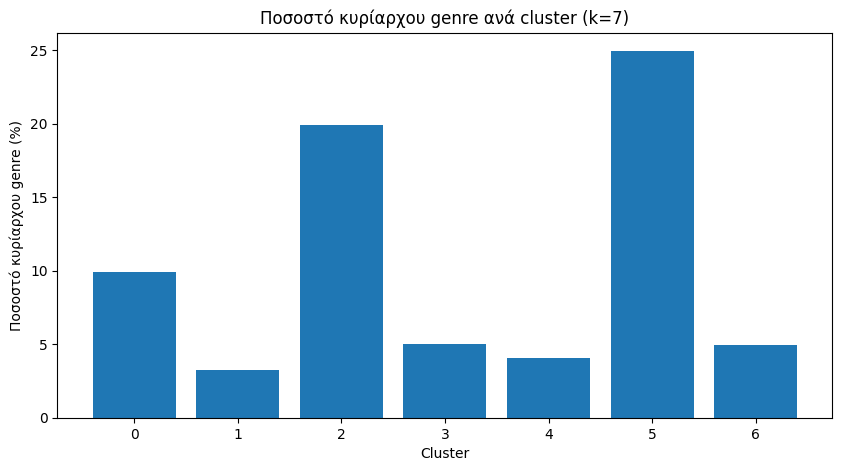

In [23]:
df_analysis = df_metadata.copy()
df_analysis['track_genre'] = df['track_genre'].values
dominant_genre_stats = []

for cluster_id in sorted(df_analysis['cluster_elbow_7'].unique()):

    cluster_data = df_analysis[df_analysis['cluster_elbow_7'] == cluster_id]

    total_tracks = len(cluster_data)

    genre_counts = cluster_data['track_genre'].value_counts()

    dominant_genre = genre_counts.idxmax()
    dominant_count = genre_counts.max()

    percentage = (dominant_count / total_tracks) * 100

    dominant_genre_stats.append({
        'cluster': cluster_id,
        'dominant_genre': dominant_genre,
        'percentage': percentage
    })

dominant_df = pd.DataFrame(dominant_genre_stats)
dominant_df
plt.figure(figsize=(10, 5))
plt.bar(
    dominant_df['cluster'],
    dominant_df['percentage']
)

plt.xlabel('Cluster')
plt.ylabel('Ποσοστό κυρίαρχου genre (%)')
plt.title('Ποσοστό κυρίαρχου genre ανά cluster (k=7)')
plt.xticks(dominant_df['cluster'])
plt.show()

In [24]:
TRACK_NAME = 'S.O.S'
ARTIST_NAME = 'Indila'
CLUSTER_COL = 'cluster_elbow_7'
TOP_N = 3


selected_index = df_metadata[
    (df_metadata['track_name'] == TRACK_NAME) &
    (df_metadata['artists'].str.contains(ARTIST_NAME))
].index[0]

selected_cluster = df_metadata.loc[selected_index, CLUSTER_COL]

print("Επιλεγμένο τραγούδι:")
print(df_metadata.loc[selected_index, ['track_name', 'artists', CLUSTER_COL]])
print("\n")

cluster_indices = df_metadata[
    df_metadata[CLUSTER_COL] == selected_cluster
].index


selected_vector = X_scaled[selected_index].reshape(1, -1)
cluster_vectors = X_scaled[cluster_indices]

eucl_dist = euclidean_distances(selected_vector, cluster_vectors)[0]

eucl_df = pd.DataFrame({
    'index': cluster_indices,
    'distance': eucl_dist
})

eucl_df = eucl_df[eucl_df['index'] != selected_index]
top3_eucl = eucl_df.sort_values('distance').head(TOP_N)

print("Top-3 προτάσεις με Ευκλείδεια Απόσταση:")
print(df_metadata.loc[top3_eucl['index'], ['track_name', 'artists']])
print("\n")


cos_dist = cosine_distances(selected_vector, cluster_vectors)[0]

cos_df = pd.DataFrame({
    'index': cluster_indices,
    'distance': cos_dist
})

cos_df = cos_df[cos_df['index'] != selected_index]
top3_cos = cos_df.sort_values('distance').head(TOP_N)

print("Top-3 προτάσεις με Cosine Distance:")
print(df_metadata.loc[top3_cos['index'], ['track_name', 'artists']])


Επιλεγμένο τραγούδι:
track_name          S.O.S
artists            Indila
cluster_elbow_7         1
Name: 36029, dtype: object


Top-3 προτάσεις με Ευκλείδεια Απόσταση:
                           track_name        artists
36020                           Magic     Polo & Pan
36537                     Le figurant  Michel Sardou
36422  What a Friend We Have In Jesus   Paul Baloche


Top-3 προτάσεις με Cosine Distance:
                           track_name        artists
36020                           Magic     Polo & Pan
36537                     Le figurant  Michel Sardou
36422  What a Friend We Have In Jesus   Paul Baloche


Επαναλήφθηκε το σύστημα προτάσεων για το τραγούδι S.O.S της Indila με χρήση k=7, όπως προέκυψε από το Elbow Method. Οι προτάσεις υπολογίστηκαν τόσο με βάση την Ευκλείδεια απόσταση όσο και με βάση την Cosine Distance. Και στις δύο περιπτώσεις προέκυψαν οι ίδιες προτάσεις, γεγονός που υποδηλώνει σταθερότητα και συνέπεια του συστήματος προτάσεων.

Ερώτημα 9

DBSCAN

In [25]:
dbscan = DBSCAN(
    eps=2.5,
    min_samples=10,
    n_jobs=-1
)

labels_dbscan = dbscan.fit_predict(X_scaled)
df_metadata['cluster_dbscan'] = labels_dbscan

n_clusters_dbscan = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
n_noise = np.sum(labels_dbscan == -1)

print("DBSCAN clusters:", n_clusters_dbscan)
print("DBSCAN noise points:", n_noise)

DBSCAN clusters: 252
DBSCAN noise points: 11843


HDBSCAN

In [26]:
hdb = hdbscan.HDBSCAN(
    min_cluster_size=50,
    min_samples=10
)

labels_hdbscan = hdb.fit_predict(X_scaled)
df_metadata['cluster_hdbscan'] = labels_hdbscan

n_clusters_hdbscan = len(set(labels_hdbscan)) - (1 if -1 in labels_hdbscan else 0)
n_noise_hdb = np.sum(labels_hdbscan == -1)

print("HDBSCAN clusters:", n_clusters_hdbscan)
print("HDBSCAN noise points:", n_noise_hdb)

HDBSCAN clusters: 114
HDBSCAN noise points: 27


Σύγκριση με Ερωτήματα 4 & 8

In [27]:
print("\nΣΥΓΚΡΙΣΗ ΑΡΙΘΜΟΥ CLUSTERS")
print("K-Means: ", 10)
print("K-Means: ", 7)
print("DBSCAN     :", n_clusters_dbscan)
print("HDBSCAN    :", n_clusters_hdbscan)


ΣΥΓΚΡΙΣΗ ΑΡΙΘΜΟΥ CLUSTERS
K-Means:  10
K-Means:  7
DBSCAN     : 252
HDBSCAN    : 114


Η σύγκριση των αλγορίθμων αναδεικνύει τη βασική διαφορά μεταξύ της συνολικής προσέγγισης του K-Means και της πυκνοτικής προσέγγισης των DBSCAN/HDBSCAN στην ανάλυση μουσικών δεδομένων. Ο K-Means (με 7 και 10 clusters) αποδεικνύεται αποτελεσματικός για τη δημιουργία πολλών ομάδων, όπως πολλά μουσικά είδη. Ο DBSCAN με 252 clusters, εντοπίζει πολύ εξειδικευμένα μοτίβα στα δεδομένα, γεγονός που υποδηλώνει υψηλή ευαισθησία στην τοπική πυκνότητα αλλά και παρουσία θορύβου. Τέλος ο HDBSCAN (114 clusters) παρουσιάζει πιο ισορροπημένη συμπεριφορά, καθώς εντοπίζει φυσικές υπο ομάδες και διαχειρίζεται αποτελεσματικότερα τις μεταβολές της πυκνότητας των δεδομένων σε σύγκριση με τον απλό DBSCAN.